# AWAC 데이터 처리 Code

1. $PNORI.csv: Information(configurtion)  
 
2. $PNORS.csv: Sensor data  

3. $PNORC.csv: Current velocity data  

4. $PNORW.csv: Wave parameters  

5. $PNORB.csv: Wave band parameters  

6. $PNORF.csv: Fourier coefficient spectra  

In [1]:
# python 모듈 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from windrose import WindroseAxes

## 4.2 설치상태

In [2]:
# 센서 파일 불러오기
sensor = pd.read_csv("$PNORS_check.csv")
sensor.head()

,Identifier,Date,Time,Error code (hex),Status code (hex),Battery voltage (V),Sound speed (m/s),Heading (deg),Pitch (deg),Roll (deg),Pressure (dbar),Temperature (deg C),Analog input #1 (counts),Checksum (hex)
0,$PNORS,80122,0,0,30,14.0,1525.5,238.5,-4.6,2.0,16.281,21.47,0,0*46
1,$PNORS,80122,2000,0,30,14.0,1527.6,238.4,-4.7,2.3,16.435,22.33,0,0*4F
2,$PNORS,80122,4000,0,30,14.0,1529.2,238.5,-4.7,2.2,16.701,22.91,0,0*4F
3,$PNORS,80122,10000,0,30,14.0,1530.4,238.5,-4.7,2.3,17.045,23.39,0,0*40
4,$PNORS,80122,12000,0,30,14.0,1526.1,238.5,-4.7,2.2,17.464,21.74,0,0*4D


In [3]:
# 날짜, 시간 열 병합
sensor['Date'] = sensor['Date'].apply(lambda x : str(x).zfill(6))
sensor['Date'] = pd.to_datetime(sensor['Date'], format='%m%d%y')
sensor['Date'] = sensor['Date'].dt.date.astype(str)

sensor['Time'] = sensor['Time'].apply(lambda x : str(x).zfill(6))
sensor['Time'] = pd.to_datetime(sensor['Time'], format='%H%M%S')
sensor['Time'] = sensor['Time'].dt.time.astype(str)

sensor['Datetime'] = sensor['Date'] + " " + sensor['Time']

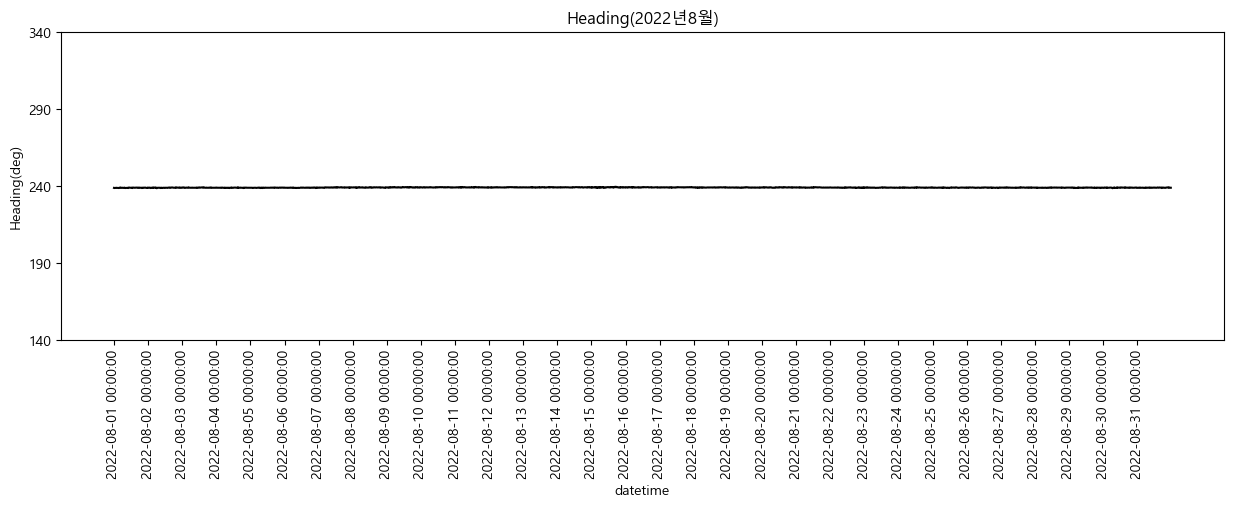

In [4]:
# Heading 시계열 그리기
ML = len(sensor)
plt.rc('font', family='Malgun Gothic')
x = sensor.iloc[:,-1]
y = sensor.iloc[:,7]
plt.figure(figsize=(15,4))
plt.plot(x,y, color = 'black')
plt.xticks(np.arange(0,ML,72), rotation=90)
plt.yticks(np.arange(140,360,50), rotation=0)
plt.title('Heading(2022년8월)', size=12)
plt.xlabel('datetime')
plt.ylabel('Heading(deg)')
plt.show()

## 4.3 수온

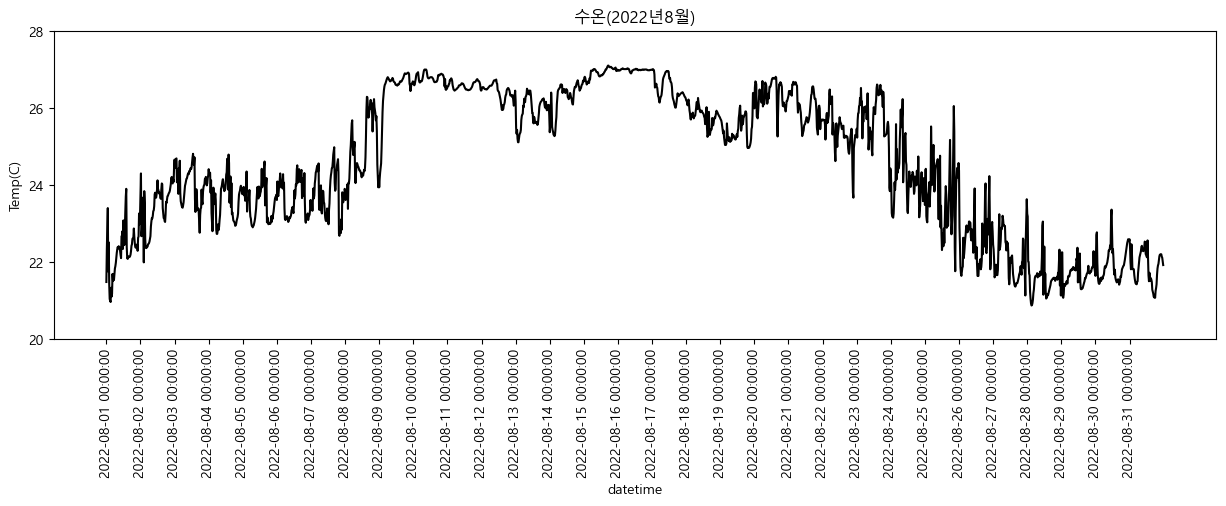

In [5]:
# 수온 시계열 그리기
ML = len(sensor)
plt.rc('font', family='Malgun Gothic')
x = sensor.iloc[:,-1]
y = sensor.iloc[:,11]
plt.figure(figsize=(15,4))
plt.plot(x,y, color = 'black')
plt.xticks(np.arange(0,ML,72), rotation=90)
plt.yticks(np.arange(20,30,2), rotation=0)
plt.title('수온(2022년8월)', size=12)
plt.xlabel('datetime')
plt.ylabel('Temp(C)')
plt.show()

In [6]:
sensor["Temperature (deg C)"].describe().round(2)

count    2232.00
mean       24.60
std         1.84
min        20.86
25%        23.06
50%        24.86
75%        26.36
max        27.09
Name: Temperature (deg C), dtype: float64

## 4.4 조위

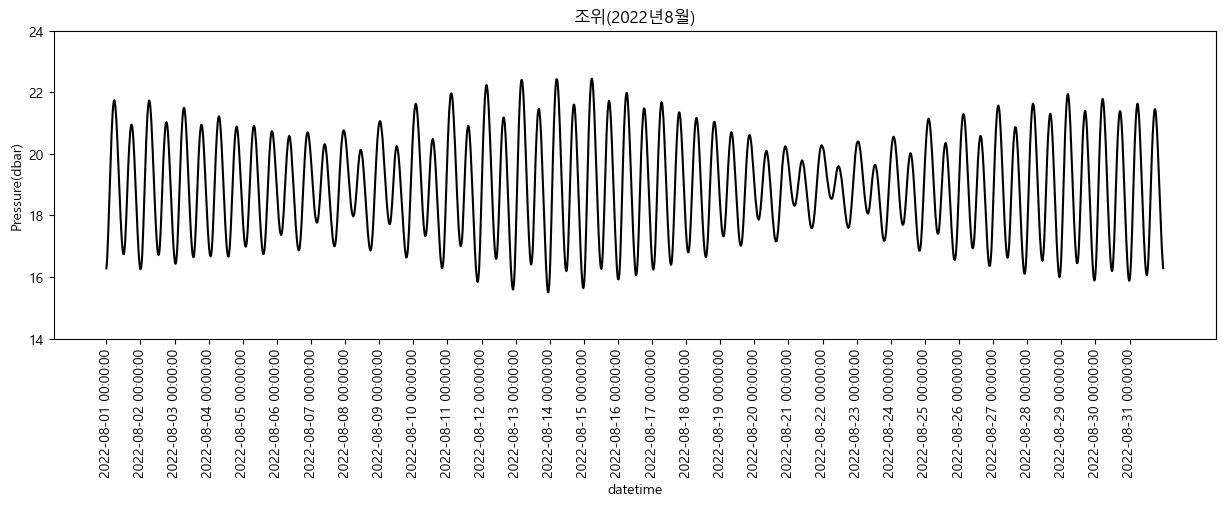

In [7]:
# 조위 시계열 그리기
ML = len(sensor)
plt.rc('font', family='Malgun Gothic')
x = sensor.iloc[:,-1]
y = sensor.iloc[:,10]
plt.figure(figsize=(15,4))
plt.plot(x,y, color = 'black')
plt.xticks(np.arange(0,ML,72), rotation=90)
plt.yticks(np.arange(14,26,2), rotation=0)
plt.title('조위(2022년8월)', size=12)
plt.xlabel('datetime')
plt.ylabel('Pressure(dbar)')
plt.show()

In [8]:
sensor["Pressure (dbar)"].describe().round(2)

count    2232.00
mean       18.94
std         1.61
min        15.50
25%        17.60
50%        18.94
75%        20.26
max        22.44
Name: Pressure (dbar), dtype: float64

## 4.5 파랑

In [9]:
# 파랑 파일 불러오기
wave = pd.read_csv("$PNORW_check.csv")

# 날짜, 시간 열 병합
wave['Date'] = wave['Date'].apply(lambda x : str(x).zfill(6))
wave['Date'] = pd.to_datetime(wave['Date'], format='%m%d%y')
wave['Date'] = wave['Date'].dt.date.astype(str)

wave['Time'] = wave['Time'].apply(lambda x : str(x).zfill(6))
wave['Time'] = pd.to_datetime(wave['Time'], format='%H%M%S')
wave['Time'] = wave['Time'].dt.time.astype(str)

wave['Datetime'] = wave['Date'] + " " + wave['Time']

# 필터링
wave.drop(wave[wave['H3 (m)'] < 0].index, inplace=True)
wave.drop(wave[wave['Tp (s)'] < 0].index, inplace=True)
wave.reset_index(inplace = True)
wave.head(3)

,index,Identifier,Date,Time,Spectrum basis type,Processing method,Hm0 (m),H3 (m),H10 (m),Hmax (m),...,SprTp (deg),Main Direction (deg),Unidirectivity Index,Mean pressure (dbar),Number of no detects,Number of bad detects,Near surface Current speed (m/s),Near surface Current direction (deg),Checksum (hex),Datetime
0,0,$PNORW,2022-08-01,00:01:01,3,4,0.68,0.62,0.79,0.96,...,47.03,133.04,0.86,16.34,0,0,0.29,57.39,0000*4D,2022-08-01 00:01:01
1,1,$PNORW,2022-08-01,00:21:01,3,4,0.71,0.65,0.80,1.13,...,52.06,142.87,0.94,16.54,0,0,0.48,54.33,0000*48,2022-08-01 00:21:01
2,2,$PNORW,2022-08-01,00:41:01,3,4,0.79,0.74,0.94,1.34,...,48.87,143.45,0.90,16.85,0,0,0.53,52.85,0000*4D,2022-08-01 00:41:01


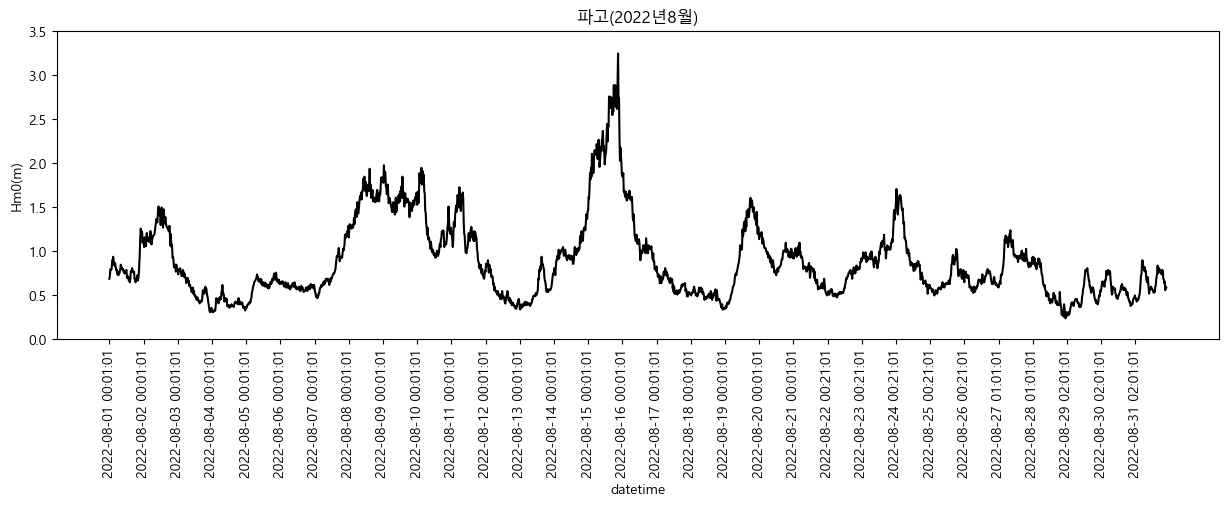

In [10]:
# 파랑(Hm0) 시계열 그리기
ML = len(wave)
plt.rc('font', family='Malgun Gothic')
x = wave.iloc[:,-1]
y = wave.iloc[:,6]
plt.figure(figsize=(15,4))
plt.plot(x,y, color = 'black')
plt.xticks(np.arange(0,ML,72), rotation=90)
plt.yticks(np.arange(0,4,0.5), rotation=0)
plt.title('파고(2022년8월)', size=12)
plt.xlabel('datetime')
plt.ylabel('Hm0(m)')
plt.show()

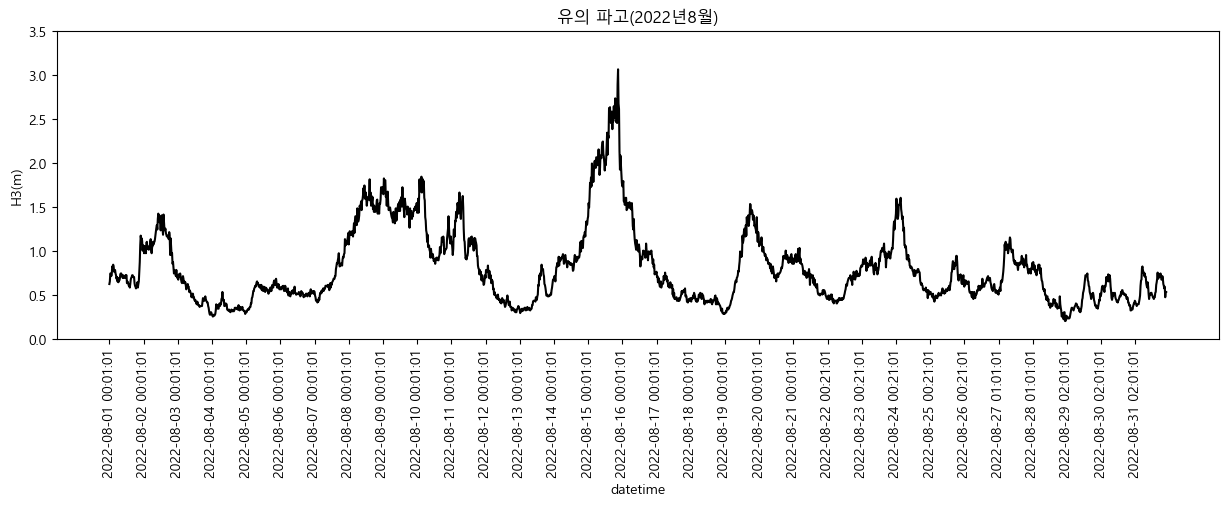

In [11]:
# 파랑(H3) 시계열 그리기
ML = len(wave)
plt.rc('font', family='Malgun Gothic')
x = wave.iloc[:,-1]
y = wave.iloc[:,7]
plt.figure(figsize=(15,4))
plt.plot(x,y, color = 'black')
plt.xticks(np.arange(0,ML,72), rotation=90)
plt.yticks(np.arange(0,4,0.5), rotation=0)
plt.title('유의 파고(2022년8월)', size=12)
plt.xlabel('datetime')
plt.ylabel('H3(m)')
plt.show()

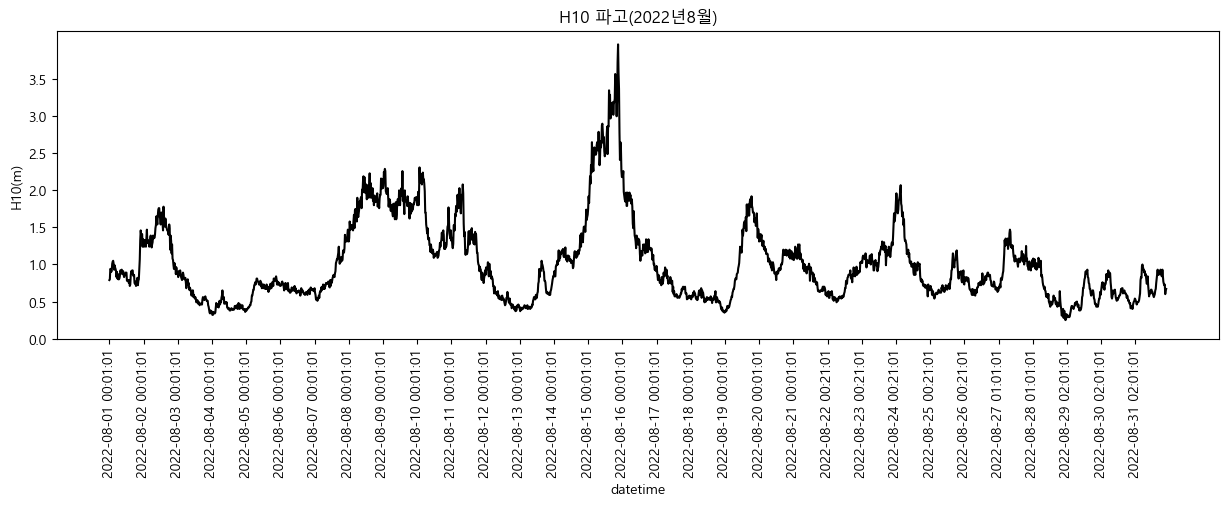

In [12]:
# 파랑(H10) 시계열 그리기
ML = len(wave)
plt.rc('font', family='Malgun Gothic')
x = wave.iloc[:,-1]
y = wave.iloc[:,8]
plt.figure(figsize=(15,4))
plt.plot(x,y, color = 'black')
plt.xticks(np.arange(0,ML,72), rotation=90)
plt.yticks(np.arange(0,4,0.5), rotation=0)
plt.title('H10 파고(2022년8월)', size=12)
plt.xlabel('datetime')
plt.ylabel('H10(m)')
plt.show()

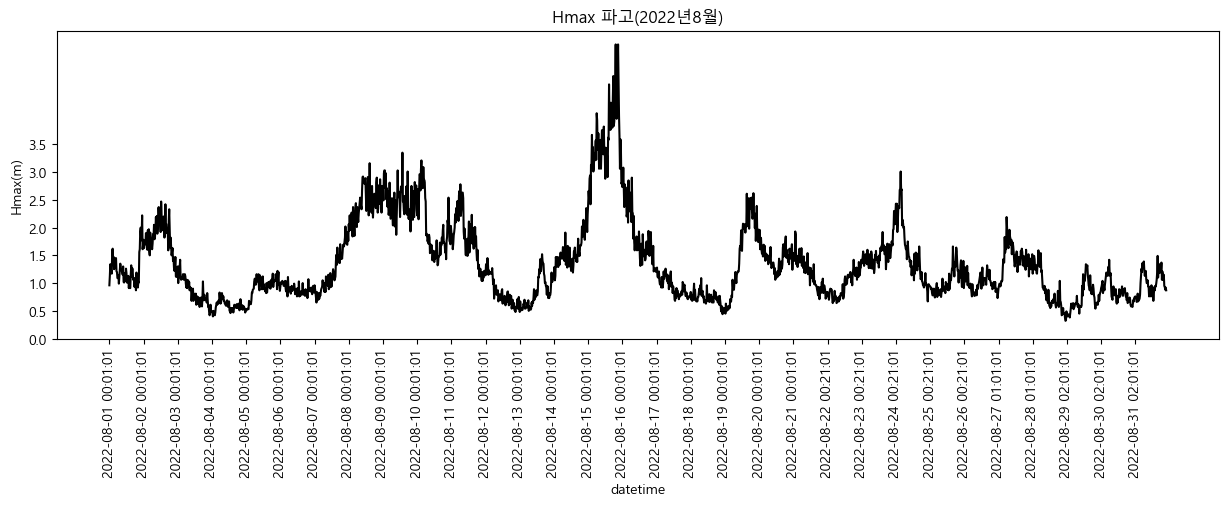

In [13]:
# 파랑(Hmax) 시계열 그리기
ML = len(wave)
plt.rc('font', family='Malgun Gothic')
x = wave.iloc[:,-1]
y = wave.iloc[:,9]
plt.figure(figsize=(15,4))
plt.plot(x,y, color = 'black')
plt.xticks(np.arange(0,ML,72), rotation=90)
plt.yticks(np.arange(0,4,0.5), rotation=0)
plt.title('Hmax 파고(2022년8월)', size=12)
plt.xlabel('datetime')
plt.ylabel('Hmax(m)')
plt.show()

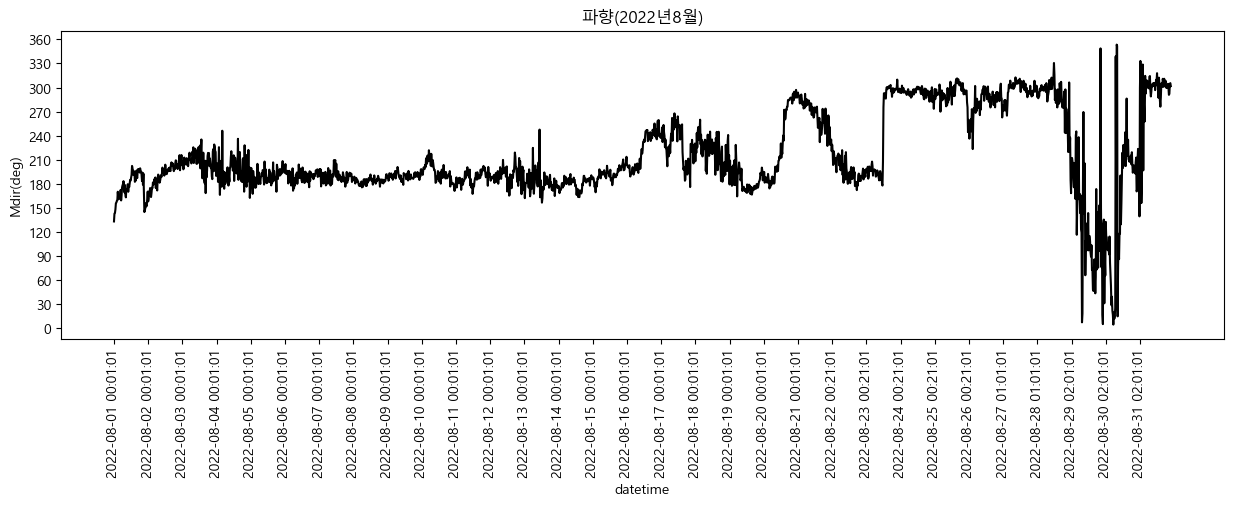

In [14]:
# 파랑(Mdir) 시계열 그리기
ML = len(wave)
plt.rc('font', family='Malgun Gothic')
x = wave.iloc[:,-1]
y = wave.iloc[:,15]
plt.figure(figsize=(15,4))
plt.plot(x,y, color = 'black')
plt.xticks(np.arange(0,ML,72), rotation=90)
plt.yticks(np.arange(0,390,30), rotation=0)
plt.title('파향(2022년8월)', size=12)
plt.xlabel('datetime')
plt.ylabel('Mdir(deg)')
plt.show()

In [15]:
# 통계 결과
parameter = ["Hm0 (m)", "H3 (m)", "H10 (m)", "Hmax (m)", "Tm02 (s)", "Tp (s)", "Tz (s)", "DirTp (deg)", "SprTp (deg)", "Main Direction (deg)"]
wave[parameter].describe().round(3).transpose()

,count,mean,std,min,25%,50%,75%,max
Hm0 (m),2226.0,0.872,0.446,0.23,0.560,0.750,1.050,3.24
H3 (m),2226.0,0.801,0.432,0.20,0.490,0.690,0.980,3.06
H10 (m),2226.0,1.005,0.543,0.25,0.620,0.860,1.238,3.97
Hmax (m),2226.0,1.346,0.716,0.32,0.830,1.160,1.650,5.30
Tm02 (s),2226.0,3.100,0.652,1.81,2.600,2.990,3.540,5.15
Tp (s),2226.0,5.407,1.264,1.91,4.490,5.550,6.320,8.45
Tz (s),2226.0,3.394,0.688,1.98,2.900,3.290,3.830,6.00
DirTp (deg),2226.0,214.097,56.410,5.26,183.622,197.330,271.302,359.16
SprTp (deg),2226.0,57.560,10.121,30.33,50.395,56.315,63.940,81.00
Main Direction (deg),2226.0,214.945,51.614,4.40,185.065,196.860,250.605,353.56


## 4.6 조류

In [16]:
# 조류 파일 불러오기
current = pd.read_csv("$PNORC_check.csv")
current.head()

,Identifier,Date,Time,Cell number,Velocity 1 (m/s),Velocity 2 (m/s),Velocity 3 (m/s),Speed (m/s),Direction (deg),Amplitude units,Amplitude 1,Amplitude 2,Amplitude 3,Correlation 1 (%),Correlation 2 (%),Checksum (hex)
0,$PNORC,80122,0,1,0.54,-0.13,0.06,0.56,103.2,C,161,164,160,NaN,NaN,*20
1,$PNORC,80122,0,2,0.21,-0.24,-0.01,0.32,138.2,C,149,149,151,NaN,NaN,*02
2,$PNORC,80122,0,3,-0.11,-0.40,-0.03,0.41,195.0,C,147,138,137,NaN,NaN,*24
3,$PNORC,80122,0,4,0.19,-0.25,0.02,0.32,142.6,C,128,131,127,NaN,NaN,*20
4,$PNORC,80122,0,5,0.06,-0.17,-0.07,0.18,160.5,C,121,128,122,NaN,NaN,*09


In [17]:
# 날짜, 시간 열 병합
current['Date'] = current['Date'].apply(lambda x : str(x).zfill(6))
current['Date'] = pd.to_datetime(current['Date'], format='%m%d%y')
current['Date'] = current['Date'].dt.date.astype(str)

current['Time'] = current['Time'].apply(lambda x : str(x).zfill(6))
current['Time'] = pd.to_datetime(current['Time'], format='%H%M%S')
current['Time'] = current['Time'].dt.time.astype(str)

current['Datetime'] = current['Date'] + " " + current['Time']

In [18]:
# 수심(Cell number)별 분류
depth = current["Cell number"].unique()
current_depth = {}
for i in depth:
    current_depth[f'current_{i:02d}'] = current[(current["Cell number"] == i)]

# now you can use the dataframe of each depth; for example, current_01, current_02, .... current_20
current_depth["current_01"].head()

,Identifier,Date,Time,Cell number,Velocity 1 (m/s),Velocity 2 (m/s),Velocity 3 (m/s),Speed (m/s),Direction (deg),Amplitude units,Amplitude 1,Amplitude 2,Amplitude 3,Correlation 1 (%),Correlation 2 (%),Checksum (hex),Datetime
0,$PNORC,2022-08-01,00:00:00,1,0.54,-0.13,0.06,0.56,103.2,C,161,164,160,NaN,NaN,*20,2022-08-01 00:00:00
20,$PNORC,2022-08-01,00:20:00,1,0.19,-0.20,0.00,0.28,136.9,C,160,177,162,NaN,NaN,*05,2022-08-01 00:20:00
40,$PNORC,2022-08-01,00:40:00,1,0.38,0.02,0.00,0.38,87.4,C,166,174,180,NaN,NaN,*3E,2022-08-01 00:40:00
60,$PNORC,2022-08-01,01:00:00,1,0.57,0.08,0.00,0.57,82.5,C,158,158,158,NaN,NaN,*33,2022-08-01 01:00:00
80,$PNORC,2022-08-01,01:20:00,1,0.24,-0.10,-0.06,0.26,112.9,C,162,171,168,NaN,NaN,*09,2022-08-01 01:20:00


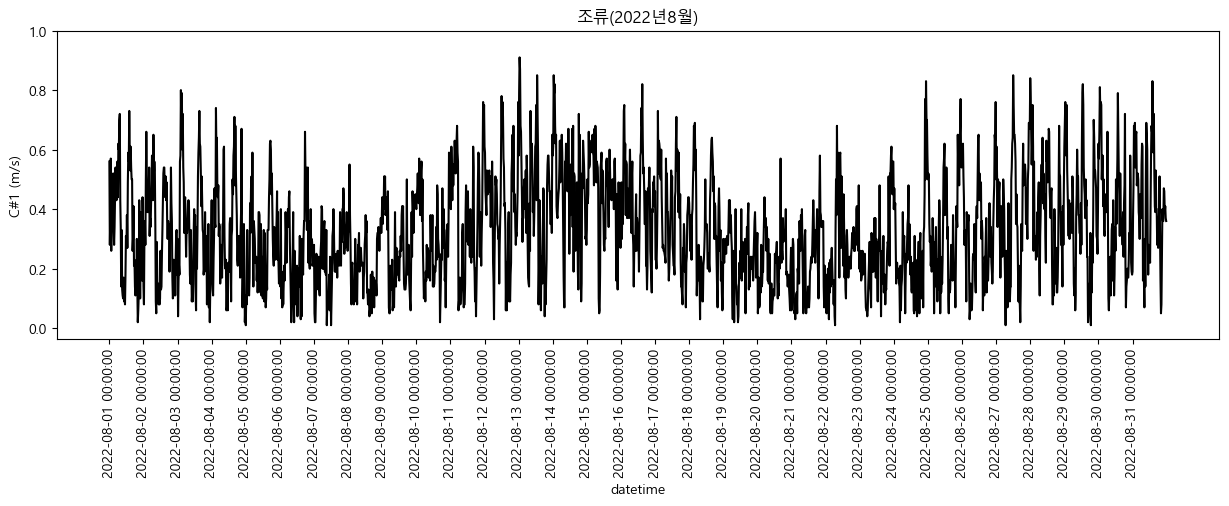

In [19]:
# 조류(C#1) 시계열 그리기
ML = len(current_depth["current_01"])
plt.rc('font', family='Malgun Gothic')
x = current_depth["current_01"].iloc[:,-1]
y = current_depth["current_01"].iloc[:,7]
plt.figure(figsize=(15,4))
plt.plot(x,y, color = 'black')
plt.xticks(np.arange(0,ML,72), rotation=90)
plt.yticks(np.arange(0,1.2,0.2), rotation=0)
plt.title('조류(2022년8월)', size=12)
plt.xlabel('datetime')
plt.ylabel('C#1 (m/s)')
plt.show()

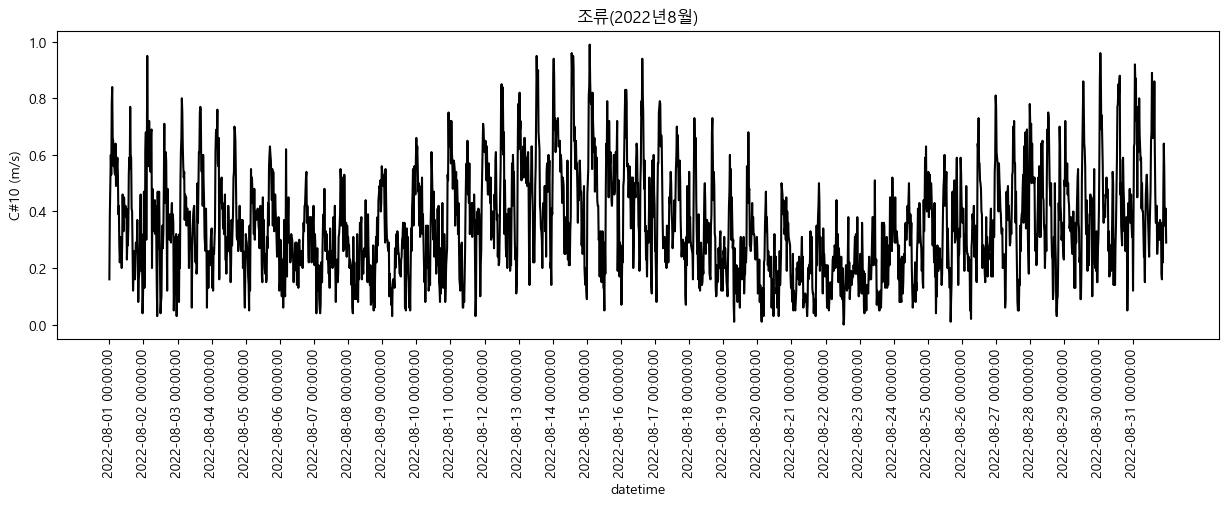

In [20]:
# 조류(C#10) 시계열 그리기
ML = len(current_depth["current_10"])
plt.rc('font', family='Malgun Gothic')
x = current_depth["current_10"].iloc[:,-1]
y = current_depth["current_10"].iloc[:,7]
plt.figure(figsize=(15,4))
plt.plot(x,y, color = 'black')
plt.xticks(np.arange(0,ML,72), rotation=90)
plt.yticks(np.arange(0,1.2,0.2), rotation=0)
plt.title('조류(2022년8월)', size=12)
plt.xlabel('datetime')
plt.ylabel('C#10 (m/s)')
plt.show()

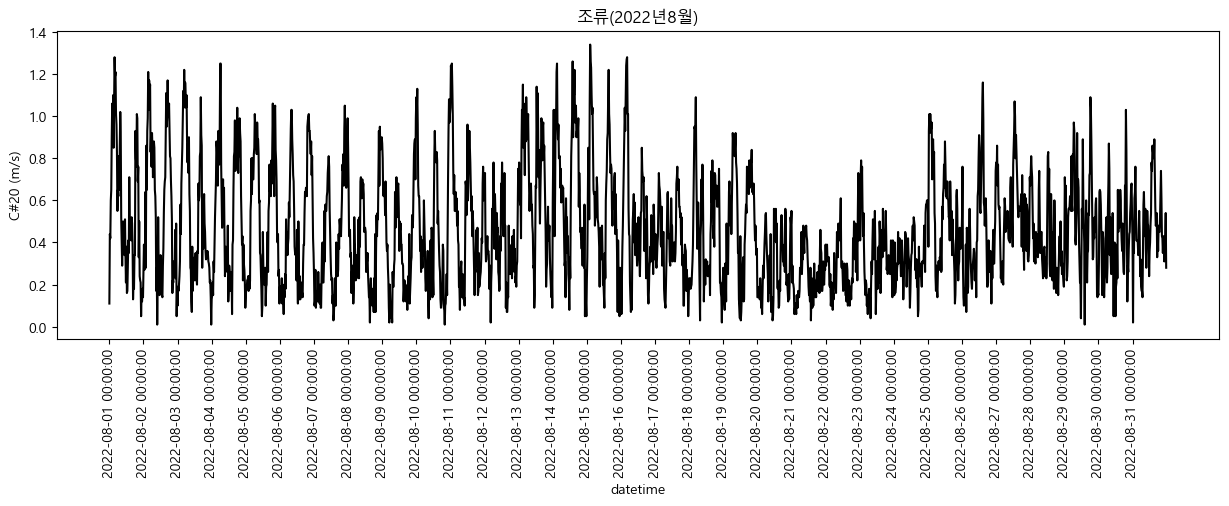

In [21]:
# 조류(C#20) 시계열 그리기
ML = len(current_depth["current_20"])
plt.rc('font', family='Malgun Gothic')
x = current_depth["current_20"].iloc[:,-1]
y = current_depth["current_20"].iloc[:,7]
plt.figure(figsize=(15,4))
plt.plot(x,y, color = 'black')
plt.xticks(np.arange(0,ML,72), rotation=90)
plt.yticks(np.arange(0,1.6,0.2), rotation=0)
plt.title('조류(2022년8월)', size=12)
plt.xlabel('datetime')
plt.ylabel('C#20 (m/s)')
plt.show()

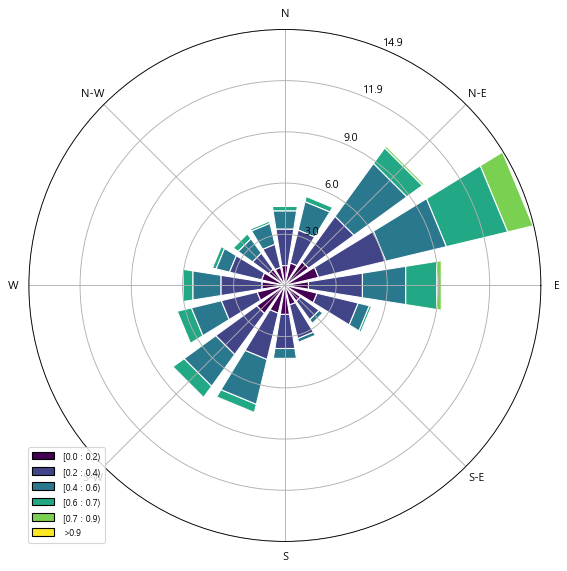

In [22]:
ax = WindroseAxes.from_ax()
ax.bar(current_depth["current_01"].iloc[:,8], current_depth["current_01"].iloc[:,7], normed=True, opening=0.8, edgecolor="white")
ax.set_legend()

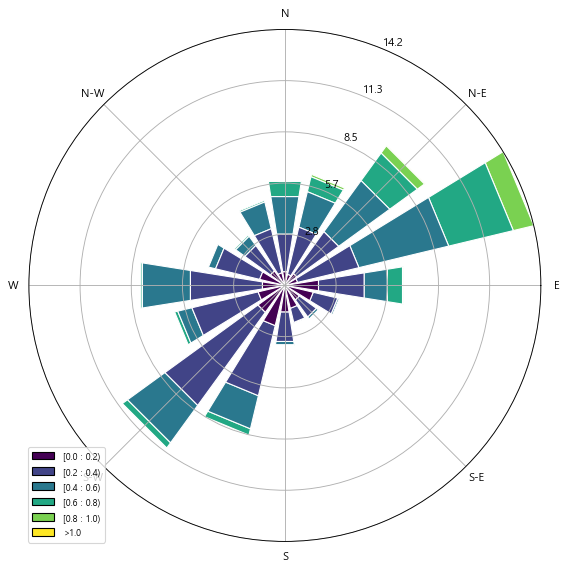

In [23]:
ax = WindroseAxes.from_ax()
ax.bar(current_depth["current_10"].iloc[:,8], current_depth["current_10"].iloc[:,7], normed=True, opening=0.8, edgecolor="white")
ax.set_legend()

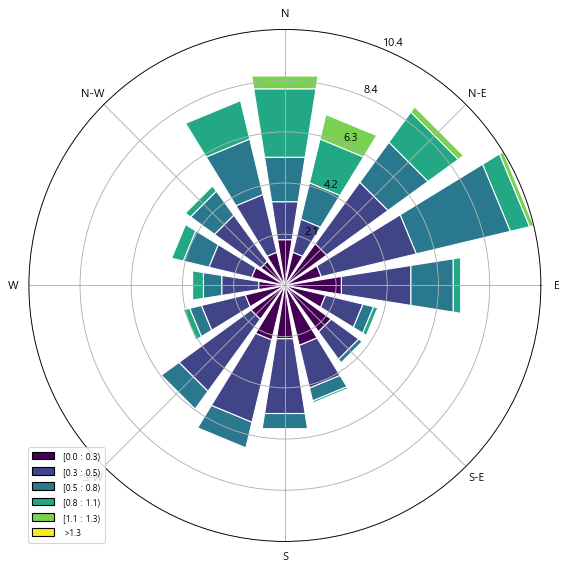

In [24]:
ax = WindroseAxes.from_ax()
ax.bar(current_depth["current_20"].iloc[:,8], current_depth["current_20"].iloc[:,7], normed=True, opening=0.8, edgecolor="white")
ax.set_legend()

In [25]:
# 통계 결과
parameter = ["Speed (m/s)", "Direction (deg)"]
statistics = pd.DataFrame()
for i in depth:
    results = current_depth[f'current_{i:02d}'][parameter].describe()
    results.columns = [f'C#{i:02d} (m/s)', f'CD#{i:02d} (deg)']
    results = results.round(3).transpose()
    statistics = pd.concat([statistics, results])
statistics

,count,mean,std,min,25%,50%,75%,max
C#01 (m/s),2232.0,0.329,0.177,0.01,0.190,0.31,0.450,0.91
CD#01 (deg),2232.0,158.212,101.023,0.00,67.700,146.40,242.100,359.50
C#02 (m/s),2232.0,0.352,0.187,0.01,0.210,0.33,0.472,1.05
CD#02 (deg),2232.0,158.652,101.507,0.00,66.450,151.20,240.950,359.60
C#03 (m/s),2232.0,0.341,0.178,0.00,0.210,0.32,0.460,1.14
CD#03 (deg),2232.0,163.725,100.676,0.00,72.975,162.25,238.350,359.60
C#04 (m/s),2232.0,0.362,0.184,0.01,0.230,0.34,0.480,1.12
CD#04 (deg),2232.0,165.205,101.125,0.00,71.900,172.60,241.700,359.80
C#05 (m/s),2232.0,0.365,0.189,0.01,0.220,0.34,0.480,1.28
CD#05 (deg),2232.0,163.408,102.398,0.20,68.400,168.65,242.800,359.90
